Back Propergation

In [21]:
#back propergation examples
import numpy as np
from tqdm import tnrange, tqdm_notebook

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in tqdm_notebook(xrange(steps), desc="steps"):
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] >= 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in xrange(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in xrange(len(R)):
            for j in xrange(len(R[i])):
                if R[i][j] >= 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in xrange(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    
    E = np.zeros((len(R), len(R[0])))
    E.fill(-1)
    for i in xrange(len(R)):
        for j in xrange(len(R[i])):
            if R[i][j] >= 0:
                E[i][j] = R[i][j] - np.dot(P[i,:],Q[:,j])
    
    return P, Q.T, E

Pre Done Test Bench

In [2]:
R = [
     [5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [0,1,5,4],
    ]

R = np.array(R)

N = len(R)
M = len(R[0])
K = 2

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

nP, nQ = matrix_factorization(R, P, Q, K)
nR = np.dot(nP, nQ.T)

In [3]:
#result of pre done test
print(nR)

[[ 5.14183496  1.92218875 -0.66371738  1.50252057]
 [ 3.42328011  1.28733559 -0.40942602  1.05819239]
 [ 1.4875933   1.02203462  1.79785349  3.98190329]
 [ 1.12282518  0.78423154  1.41170323  3.10301543]
 [-0.3910682   0.54198707  2.98958176  5.12504953]]



Print off all the games.

In [24]:
class GameStats:

    def __init__(self):
        #parse the text file
        self.statsFile = open("baseball2016.txt", "r")
        self.topArray = []
        self.sideArray = []  
        self.sc = np.zeros((30,30,30), np.int32) 
        self.sc[:,:,:] = -1  
        self.am = np.zeros((30,30), np.float32)

        for line in self.statsFile:
            homeTeam = ""
            awayTeam = ""
            homeScore = 0
            awayScore = 0
            i=0
            token = line.split(',')  #tokenize the string
            '''
            away team name @ i =3
            home team name @ i = 6
            away score @ i = 9
            home score @ i = 10
            '''
            for str in token:
                if ((i == 3) or (i == 6)):   #find the word i want
                    noQuotes = str.split('"')
                    if (i == 3): awayTeam = noQuotes[1]
                    if (i == 6): homeTeam = noQuotes[1]
                if (i == 9): 
                    awayScore = str
                    print(awayTeam + ": " + awayScore + " (away)")
                if (i == 10): 
                    homeScore = str
                    print(homeTeam + ": " + homeScore + " (home) ")
                    print('-------')
                i += 1
            self.addScore(homeTeam, awayTeam, homeScore, awayScore)  
        self.buildAvgMatrix()
        self.statsFile.close()
        
    #give it two teams, the scores, and it will add it to the matrix
    def addScore(self, team1, team2, score1, score2):
        '''
        for a team in top array, the index in the array corrisponds to the matrix column there located in
        for a team in side array, the index in the array corrisponds to the matrix row there located in
        '''
        #team 1 score entry
        try:
            row = self.sideArray.index(team2)    

        except:
            self.sideArray.append(team2)
            row = self.sideArray.index(team2)    

        try:
            col = self.topArray.index(team1)
        except:
            self.topArray.append(team1)
            col = self.topArray.index(team1)
        temp = self.sc[row, col]
        counter = 0
        for e in temp:
            if (e == -1):
                temp[counter] = score1
                break
            counter += 1
        self.sc[row, col] = temp
        
        #team 2 score entry
        try:
            row = self.sideArray.index(team1)    
        except:
            self.sideArray.append(team1)
            row = self.sideArray.index(team1)    
            
        try:
            col = self.topArray.index(team2)
        except:
            self.topArray.append(team2)
            col = self.topArray.index(team2)
        temp = self.sc[row, col]
        counter = 0
        for e in temp:
            if (e == -1):
                temp[counter] = score2
                break
            counter += 1
        self.sc[row, col] = temp
    
    #returns the score(s) for match up
    def getScore(self, team1, team2, gameSelect = None):
        print(team1, team2)
        try:
            score1 = self.sc[self.sideArray.index(team2), self.topArray.index(team1)]
            score2 = self.sc[self.sideArray.index(team1), self.topArray.index(team2)]
            if (gameSelect == None):
                print(team1, score1)
                print(team2, score2)
            else:
                print(team1, score1[gameSelect])
                print(team2, score2[gameSelect])
        except:
            print('Invalid input of teams')
    
    #constructs a matrix of the avg score in a matchup
    def buildAvgMatrix(self): 
        for col in range(len(self.sc[:,0])):   #depth
            for row in range(len(self.sc[0, :])):  #width
                tempScore = self.sc[row, col]
                avgScore = 0.0
                count = 0.0
                for j in tempScore:
                    print(tempScore)
                    if (j != -1):
                        avgScore += j
                        count += 1
                    else:
                        break
                try:
                    avgScore = avgScore / count
                except:
                    avgScore = -1
                self.am[row, col] = avgScore
    
    #get the value of the avg score for a match up
    def getAvgScore(self, team1, team2):
        try:
            score1 = self.am[self.sideArray.index(team2), self.topArray.index(team1)]
            score2 = self.am[self.sideArray.index(team1), self.topArray.index(team2)]
            print(team1, score1)
            print(team2, score2)        
        except:
            print('Invalid input of teams')

In [5]:
box = GameStats()

NYN: 3 (away)
KCA: 4 (home) 
-------
TOR: 5 (away)
TBA: 3 (home) 
-------
SLN: 1 (away)
PIT: 4 (home) 
-------
CHN: 9 (away)
ANA: 0 (home) 
-------
MIN: 2 (away)
BAL: 3 (home) 
-------
CHA: 4 (away)
OAK: 3 (home) 
-------
TOR: 5 (away)
TBA: 3 (home) 
-------
SEA: 2 (away)
TEX: 3 (home) 
-------
COL: 10 (away)
ARI: 5 (home) 
-------
WAS: 4 (away)
ATL: 3 (home) 
-------
PHI: 2 (away)
CIN: 6 (home) 
-------
SFN: 12 (away)
MIL: 3 (home) 
-------
LAN: 15 (away)
SDN: 0 (home) 
-------
CHN: 6 (away)
ANA: 1 (home) 
-------
BOS: 6 (away)
CLE: 2 (home) 
-------
NYN: 2 (away)
KCA: 0 (home) 
-------
HOU: 5 (away)
NYA: 3 (home) 
-------
CHA: 5 (away)
OAK: 4 (home) 
-------
TOR: 2 (away)
TBA: 3 (home) 
-------
SEA: 10 (away)
TEX: 2 (home) 
-------
COL: 6 (away)
ARI: 11 (home) 
-------
DET: 8 (away)
MIA: 7 (home) 
-------
SFN: 2 (away)
MIL: 1 (home) 
-------
SLN: 5 (away)
PIT: 6 (home) 
-------
LAN: 3 (away)
SDN: 0 (home) 
-------
MIN: 2 (away)
BAL: 4 (home) 
-------
BOS: 6 (away)
CLE: 7 (home) 
----

In [10]:
box.getAvgScore('TOR', 'KCA')

('TOR', 4.1666665)
('KCA', 3.5)


In [11]:
#Trying to plt the matrix - needs some work though
import matplotlib.pyplot as plt

plt.imshow(box.am, interpolation='none', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)

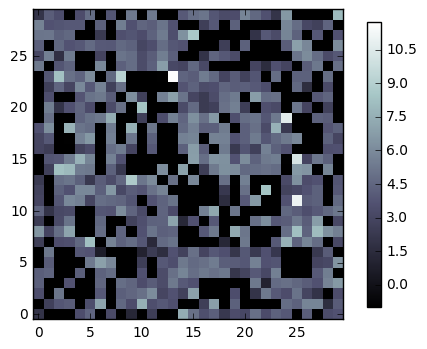

In [12]:
plt.show()

In [50]:
R = box.am

N = len(R)
M = len(R[0])
K = 15

P = np.random.rand(N,K)
Q = np.random.rand(M,K)

nP, nQ, E = matrix_factorization(R, P, Q, K)
nR = np.dot(nP, nQ.T)
print("Average Error: " + str(np.mean(E)))
print(nR)


Average Error: -0.326803260334
[[  2.16643442   4.39503623   3.12178014   4.04764175   3.41951749
    4.66112349   3.87192637   3.37797643   3.36189153   1.4314276
    2.16724455   2.72119662   5.04037474   3.73303538   7.41393991
    4.89490519   3.50150292   4.26069821   2.36542366   3.3009019
    2.96569396   4.89221185   3.56521767   4.20223086   3.89912445
    2.42728837   4.25586835   2.22584689   3.61797939   3.74115179]
 [  5.27029912   2.77782394   3.84460831   4.11255354   5.17561531
    3.60042984   7.06668154   7.57393475   4.61100459   3.37169174
    7.43828375   3.71343259   4.04670966   3.58016528   1.79779531
    4.19419442   2.76211189   6.83235272   2.25352771   4.4731861
    2.47916204   7.10194035   5.76035077   4.88883443   4.8909568
    4.40583825   5.81821068   5.81429226   1.57361919   3.99423822]
 [  3.65182788   4.2204922    5.19286614   4.09285939   6.47864771
    2.45851169   3.99810842   4.59947362   4.30144928   4.68405891
    4.93274621   5.95542392   3.

In [54]:
def meanIgnoringValue(array, ignore):
    count = 0
    sum = 0
    for i in xrange(len(array)):
        for x in xrange(len(array[0])):
            if(array[i,x] not in ignore):
                count += 1
                sum += array[i, x]
            
    return sum/count   

scores = np.rint(nR)
actualScores = np.rint(R)
scoreError = np.zeros((len(actualScores), len(actualScores[0])))
scoreError.fill(-1)
for i in xrange(len(actualScores)):
    for j in xrange(len(actualScores[i])):
        if actualScores[i][j] >= 0:
            scoreError[i][j] = actualScores[i][j] - scores[i][j]
print("Average Score Error: " + str(meanIgnoringValue(scoreError, [-1])))
print(scoreError)

Average Score Error: 0.0401396160558
[[ 0. -1. -1. -1.  1. -1. -1.  0. -1.  0. -1.  0. -1. -1.  1.  0.  0.  0.
   0.  0.  0.  0. -1.  0.  0. -1.  0. -1. -1.  0.]
 [-1.  0.  0.  0. -1.  0.  0. -1.  0.  0.  1.  0.  0.  0. -1. -1.  0.  0.
  -1.  0. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1.
  -1.  1. -1.  0.  0.  0.  0.  0.  0.  0. -1. -1.]
 [ 0. -1. -1.  0. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  1. -1. -1.
  -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0. -1. -1. -1. -1.  0.  0. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  1. -1.]
 [-1.  0. -1. -1. -1.  0.  0.  0. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0. -1. -1. -1.  0.  0. -1.]
 [-1.  0. -1. -1.  0.  0.  0. -1. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.
   0.  0.  0. -1.  0.  0. -1. -1. -1.  0.  0. -1.]
 [ 0. -1.  0.  0.  0.  0. -1.  0.  0.  0.  0. -1.  0.  0. -1. -1. -1. -1.
   0. -1.  0. 